<a href="https://colab.research.google.com/github/EvgSkv/logica/blob/main/tutorial/Logica_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logica Tutorial 


Logica is a language of Datalog family that can be compiled to StandardSQL. In most of its syntax Logica follows Yedalog, a language developed at Google earlier. Logica is created to enjoy concise clarity of logic programming and full power of SQL-based systems like BigQuery at the same time.

Logica is semantically equivalent to StandardSQL. It is easy to write and most importantly read medium and large queries written in Logica. These queries can be compiled to StandardSQL and run on BigQuery.

**Why learn Logica?**

Learning new language is an investment.
Logica brings **readability and good engineering practices** common for languages like Python, C++, Java etc. to your queries.
Once you learn Logica you will be able to do the following **easily**:

1. **Read** your queries, not just write them! Even if you wrote it a long time ago you will be able to read and recall logic very fast.

2. **Re-use** sub-queries. Define and re-use functions.

3. **Test** your queries.

4. **CoLab** integration allows you to run a single, or multiple (potentially interdependent ) queries and populates Python variables with the results. This approach lets you express your data accumulation logic concisely in Logica and focus your Python code on what Python does best (visualization, timeseries analysis, machine learning etc)

5. **Enjoy** writing queries. For the reasons above Logica is much more fun than SQL!

In C, Python, C++, Java etc. a basic building block of your program is _function_.

In SQL a common building block in a _query_.

In Logica a basic building block is _predicate_.

**Definition**: Predicate is a statement that contains variables.

Predicate is a very general notion. Functions and queries (as well as tables) can be thought of as special kinds of predicates. 



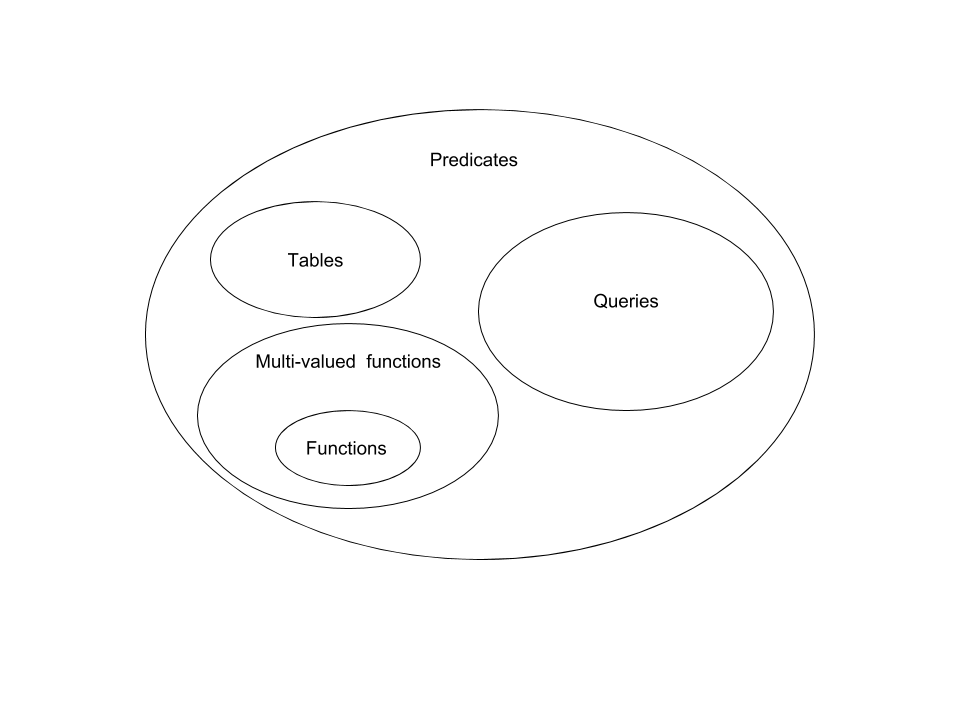


Thus Logica can easily express logic of SQL queries. Logica can also express computational instructions by defining functions and auxiliary variables similar to languages like C++ and Python.



Logica syntax is similar to set-theory and logical notation used in mathematics. Consider the definition of a set of even numbers:

$$EvenNumbers = \{x | x \in \mathbb{Z} \wedge  x / 2 \in \mathbb{Z} \}$$

Formal logic assertion which number is even:

$$x \in \mathbb{Z} \wedge  x / 2 \in \mathbb{Z} \vdash Even(x) $$

If $Z$ is a predicate corresponding to the set $\mathbb{Z}$ then we could write

$$Z(x) \wedge Z(x /2) \vdash Even(x) $$

Logica rule defining Even predicate from a predicate Z looks as follows.

```

Even(x) :- Z(x), Z(x / 2);

```

Unlike mathematics in Logica we do have to worry about computability, so we can't easily define a predicate as a subset of all integer numbers. But we can easily define Even predicate defined for a subset of positive integer numbers from 0 to 20.

First we need to install and import Logica into this CoLab.

In [ ]:
#@title Install Logica.
!pip install logica

     |████████████████████████████████| 80 kB 4.0 MB/s 


In [ ]:
#@title Import Logica.
from google.colab import auth
from logica import colab_logica
auth.authenticate_user()
colab_logica.SetProject('YOUR_PROJECT')


Now we can define the Even predicate.

In [ ]:
%%logica Even

Z(x) :- x in Range(20);

Even(x) :- Z(x), Z(x / 2);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running Even


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at Even_sql variable.
SELECT
  x_4 AS col0
FROM
  UNNEST(GENERATE_ARRAY(0, 20 - 1)) as x_4, UNNEST(GENERATE_ARRAY(0, 20 - 1)) as x_6
WHERE
  x_6 = ((x_4) / (2));


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at Even variable.


,col0
0,0
1,2
2,4
3,6
4,8
5,10
6,12
7,14
8,16
9,18


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In CoLab any evaluated predicate can be accessed from Python via a dataframe variable of the same name.



In [ ]:
print('Even numbers:', ', '.join(map(str, Even['col0'])))

Even numbers: 0, 2, 4, 6, 8, 10, 12, 14, 16, 18


You can **create a copy of this tutorial** and tweak the querries. Querries run instantly via BigQuery.

## Facts (aka Tables)

You can specify a table row-by-row as follows.

In [ ]:
%%logica Employee

Employee(name: "Alice", role: "Product Manager");
Employee(name: "Bob", role: "Engineer");
Employee(name: "Caroline", role: "Engineer");
Employee(name: "David", role: "Data Scientist");
Employee(name: "Eve", role: "Data Scientist");



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running Employee


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at Employee_sql variable.
SELECT * FROM (
  
    SELECT
      "Alice" AS name,
      "Product Manager" AS role
   UNION ALL
  
    SELECT
      "Bob" AS name,
      "Engineer" AS role
   UNION ALL
  
    SELECT
      "Caroline" AS name,
      "Engineer" AS role
   UNION ALL
  
    SELECT
      "David" AS name,
      "Data Scientist" AS role
   UNION ALL
  
    SELECT
      "Eve" AS name,
      "Data Scientist" AS role
  
) AS UNUSED_TABLE_NAME  ;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at Employee variable.


,name,role
0,Alice,Product Manager
1,Bob,Engineer
2,Caroline,Engineer
3,David,Data Scientist
4,Eve,Data Scientist


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Rules (aka Queries)

Rules define new predicates from existing. The building block-predicates are tables defined in Logica (see above), or existing BigQuery tables, which can be used directly (see Example below).

### Expressions

You can use basic operators as in most popular laguages. String concatenation is done via `++`.

In [ ]:
%%logica Test

Test(a: 1, b: 2, c: "universe");
Test(a: 1 + 2, b: 2 * (2 + 1), c: "hello" ++ " " ++ "world");


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running Test


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at Test_sql variable.
SELECT * FROM (
  
    SELECT
      1 AS a,
      2 AS b,
      "universe" AS c
   UNION ALL
  
    SELECT
      ((1) + (2)) AS a,
      ((2) * (((2) + (1)))) AS b,
      CONCAT(CONCAT("hello", " "), "world") AS c
  
) AS UNUSED_TABLE_NAME  ;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at Test variable.


,a,b,c
0,1,2,universe
1,3,6,hello world


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Structures

You can define structures via syntax that is similar to json and textproto.

In [ ]:
%%logica StructureTest

StructureTest(a: {x: 1, y: 2, z: { w: "hello", v: "world"}});
StructureTest(a: {x: 3, y: 4, z: { w: "bonjour", v: "monde"}});

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running StructureTest


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at StructureTest_sql variable.
SELECT * FROM (
  
    SELECT
      STRUCT(1 AS x, 2 AS y, STRUCT("hello" AS w, "world" AS v) AS z) AS a
   UNION ALL
  
    SELECT
      STRUCT(3 AS x, 4 AS y, STRUCT("bonjour" AS w, "monde" AS v) AS z) AS a
  
) AS UNUSED_TABLE_NAME  ;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at StructureTest variable.


,a
0,"{'x': 1, 'y': 2, 'z': {'w': 'hello', 'v': 'wor..."
1,"{'x': 3, 'y': 4, 'z': {'w': 'bonjour', 'v': 'm..."


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(StructureTest['a'].values[0]['z']['w'])

hello


### Variables

You can define auxiliary variables. Both assignment and comparison is done via `==`. A single equality sign is reserved for function definition (see Functions section).

In [ ]:
%%logica Test

Test(y: value) :-
  value == x * x + 2 * x + 5,
  x == 10;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running Test


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at Test_sql variable.
SELECT
  ((((((10) * (10))) + (((2) * (10))))) + (5)) AS y;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at Test variable.


,y
0,125


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

There are a couple of syntactical conventions regarding field names.

If field value is omitted, then it is assumed that field value is the variable with the same name as field name.

If field name is omitted then field name is assumed to be equal to colX, where X is at which position the field stands.

In [ ]:
%%logica Test1, Test2

Test1(x:, y:) :-
  y == x * x + 2 * x + 5,
  x == 10;

Test2(x, 10 * x) :- x == 5;

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running Test1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at Test1_sql variable.
SELECT
  10 AS x,
  ((((((10) * (10))) + (((2) * (10))))) + (5)) AS y;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at Test1 variable.


,x,y
0,10,125


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running Test2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at Test2_sql variable.
SELECT
  5 AS col0,
  ((10) * (5)) AS col1;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at Test2 variable.


,col0,col1
0,5,50


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Basic data extraction and filtering

You can easily extract certain columns, or filter rows.

In [ ]:
%%logica EmployeeName, Engineer, EngineersAndProductManagers

Employee(name: "Alice", role: "Product Manager");
Employee(name: "Bob", role: "Engineer");
Employee(name: "Caroline", role: "Engineer");
Employee(name: "David", role: "Data Scientist");
Employee(name: "Eve", role: "Data Scientist");

EmployeeName(name:) :- Employee(name:);

Engineer(name:) :- Employee(name:, role: "Engineer");

EngineersAndProductManagers(name:) :-
  Employee(name:, role:),
  role == "Engineer" || role == "Product Manager";


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running EmployeeName


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at EmployeeName_sql variable.
WITH t_0_Employee AS (SELECT * FROM (
  
    SELECT
      "Alice" AS name,
      "Product Manager" AS role
   UNION ALL
  
    SELECT
      "Bob" AS name,
      "Engineer" AS role
   UNION ALL
  
    SELECT
      "Caroline" AS name,
      "Engineer" AS role
   UNION ALL
  
    SELECT
      "David" AS name,
      "Data Scientist" AS role
   UNION ALL
  
    SELECT
      "Eve" AS name,
      "Data Scientist" AS role
  
) AS UNUSED_TABLE_NAME  )
SELECT
  Employee.name AS name
FROM
  t_0_Employee AS Employee;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at EmployeeName variable.


,name
0,Alice
1,Bob
2,Caroline
3,David
4,Eve


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running Engineer


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at Engineer_sql variable.
WITH t_0_Employee AS (SELECT * FROM (
  
    SELECT
      "Alice" AS name,
      "Product Manager" AS role
   UNION ALL
  
    SELECT
      "Bob" AS name,
      "Engineer" AS role
   UNION ALL
  
    SELECT
      "Caroline" AS name,
      "Engineer" AS role
   UNION ALL
  
    SELECT
      "David" AS name,
      "Data Scientist" AS role
   UNION ALL
  
    SELECT
      "Eve" AS name,
      "Data Scientist" AS role
  
) AS UNUSED_TABLE_NAME  )
SELECT
  Employee.name AS name
FROM
  t_0_Employee AS Employee
WHERE
  Employee.role = "Engineer";


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at Engineer variable.


,name
0,Bob
1,Caroline


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running EngineersAndProductManagers


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at EngineersAndProductManagers_sql variable.
WITH t_0_Employee AS (SELECT * FROM (
  
    SELECT
      "Alice" AS name,
      "Product Manager" AS role
   UNION ALL
  
    SELECT
      "Bob" AS name,
      "Engineer" AS role
   UNION ALL
  
    SELECT
      "Caroline" AS name,
      "Engineer" AS role
   UNION ALL
  
    SELECT
      "David" AS name,
      "Data Scientist" AS role
   UNION ALL
  
    SELECT
      "Eve" AS name,
      "Data Scientist" AS role
  
) AS UNUSED_TABLE_NAME  )
SELECT
  Employee.name AS name
FROM
  t_0_Employee AS Employee
WHERE
  (Employee.role = "Engineer" OR Employee.role = "Product Manager");


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at EngineersAndProductManagers variable.


,name
0,Alice
1,Bob
2,Caroline


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Expression `..<variable name>` is used to extract or emit a whole table row as one record.

In [ ]:
%%logica Engineers

Employee(name: "Alice", role: "Product Manager");
Employee(name: "Bob", role: "Engineer");
Employee(name: "Caroline", role: "Engineer");
Employee(name: "David", role: "Data Scientist");
Employee(name: "Eve", role: "Data Scientist");

Engineers(..r) :- Employee(..r), r.role == "Engineer";

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running Engineers


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at Engineers_sql variable.
WITH t_0_Employee AS (SELECT * FROM (
  
    SELECT
      "Alice" AS name,
      "Product Manager" AS role
   UNION ALL
  
    SELECT
      "Bob" AS name,
      "Engineer" AS role
   UNION ALL
  
    SELECT
      "Caroline" AS name,
      "Engineer" AS role
   UNION ALL
  
    SELECT
      "David" AS name,
      "Data Scientist" AS role
   UNION ALL
  
    SELECT
      "Eve" AS name,
      "Data Scientist" AS role
  
) AS UNUSED_TABLE_NAME  )
SELECT
  Employee.*
FROM
  t_0_Employee AS Employee
WHERE
  Employee.role = "Engineer";


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at Engineers variable.


,name,role
0,Bob,Engineer
1,Caroline,Engineer


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Conjunction (aka Join)

To join a few tables simply list the tables in the body and connect columns via same name, or via using `==`.

Note that logically the items listed via comma in the body of the rule can be thought of as conjuncts whether they are constraints, or joined tables.

In [ ]:
%%logica EmployeeLocation

Employee(name: "Alice", role: "Product Manager", office: "SEA");
Employee(name: "Bob", role: "Engineer", office: "SEA");
Employee(name: "Caroline", role: "Engineer", office: "LAX");
Employee(name: "David", role: "Data Scientist", office: "LAX");
Employee(name: "Eve", role: "Data Scientist", office: "SEA");

OfficeLocation(office: "SEA", city: "Seattle");
OfficeLocation(office: "LAX", city: "Los Angeles");

Role(name: "PM", area: "Product");
Role(name: "Eng", area: "Software");
Role(name: "AMT", area: "Statitics");

EmployeeLocation(employee: name, city:) :-
  Employee(name:, office:),
  OfficeLocation(office:, city:);



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running EmployeeLocation


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at EmployeeLocation_sql variable.
WITH t_0_Employee AS (SELECT * FROM (
  
    SELECT
      "Alice" AS name,
      "Product Manager" AS role,
      "SEA" AS office
   UNION ALL
  
    SELECT
      "Bob" AS name,
      "Engineer" AS role,
      "SEA" AS office
   UNION ALL
  
    SELECT
      "Caroline" AS name,
      "Engineer" AS role,
      "LAX" AS office
   UNION ALL
  
    SELECT
      "David" AS name,
      "Data Scientist" AS role,
      "LAX" AS office
   UNION ALL
  
    SELECT
      "Eve" AS name,
      "Data Scientist" AS role,
      "SEA" AS office
  
) AS UNUSED_TABLE_NAME  ),
t_1_OfficeLocation AS (SELECT * FROM (
  
    SELECT
      "SEA" AS office,
      "Seattle" AS city
   UNION ALL
  
    SELECT
      "LAX" AS office,
      "Los Angeles" AS city
  
) AS UNUSED_TABLE_NAME  )
SELECT
  Employee.name AS employee,
  OfficeLocation.city AS city
FROM
  t_0_Employee AS Employee, t_1_OfficeLocation AS OfficeLocation
WHERE
  OfficeLocation.office 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at EmployeeLocation variable.


,employee,city
0,Alice,Seattle
1,Bob,Seattle
2,Caroline,Los Angeles
3,David,Los Angeles
4,Eve,Seattle


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Disjunction (aka Union)

Symbol `|` denotes disjunction.

In [ ]:
%%logica WritesCode

Employee(name: "Alice", role: "Product Manager", office: "SEA");
Employee(name: "Bob", role: "Engineer", office: "SEA");
Employee(name: "Caroline", role: "Engineer", office: "LAX");
Employee(name: "David", role: "Data Scientist", office: "LAX");
Employee(name: "Eve", role: "Data Scientist", office: "SEA");

# Engineers and data scientists write code.
WritesCode(name:) :-
  Employee(name:, role: "Engineer") |
  Employee(name:, role: "Data Scientist");


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running WritesCode


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at WritesCode_sql variable.
WITH t_0_Employee AS (SELECT * FROM (
  
    SELECT
      "Alice" AS name,
      "Product Manager" AS role,
      "SEA" AS office
   UNION ALL
  
    SELECT
      "Bob" AS name,
      "Engineer" AS role,
      "SEA" AS office
   UNION ALL
  
    SELECT
      "Caroline" AS name,
      "Engineer" AS role,
      "LAX" AS office
   UNION ALL
  
    SELECT
      "David" AS name,
      "Data Scientist" AS role,
      "LAX" AS office
   UNION ALL
  
    SELECT
      "Eve" AS name,
      "Data Scientist" AS role,
      "SEA" AS office
  
) AS UNUSED_TABLE_NAME  )
SELECT * FROM (
  
    SELECT
      Employee.name AS name
    FROM
      t_0_Employee AS Employee
    WHERE
      Employee.role = "Engineer"
   UNION ALL
  
    SELECT
      Employee.name AS name
    FROM
      t_0_Employee AS Employee
    WHERE
      Employee.role = "Data Scientist"
  
) AS UNUSED_TABLE_NAME  ;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at WritesCode variable.


,name
0,Bob
1,Caroline
2,David
3,Eve


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Negation

Negation of a predicate is denoted `~`, while `!` is used to negate a boolean value.


In [ ]:
%%logica OutsideOfCalifornia

Employee(name: "Alice", role: "Product Manager", office: "SEA");
Employee(name: "Bob", role: "Engineer", office: "SEA");
Employee(name: "Caroline", role: "Engineer", office: "LAX");
Employee(name: "David", role: "Data Scientist", office: "LAX");
Employee(name: "Eve", role: "Data Scientist", office: "SEA");

InCalifornia(name:) :- Employee(name:, office:), office == "LAX";

OutsideOfCalifornia(name:) :- Employee(name:), ~InCalifornia(name:);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running OutsideOfCalifornia


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at OutsideOfCalifornia_sql variable.
WITH t_0_Employee AS (SELECT * FROM (
  
    SELECT
      "Alice" AS name,
      "Product Manager" AS role,
      "SEA" AS office
   UNION ALL
  
    SELECT
      "Bob" AS name,
      "Engineer" AS role,
      "SEA" AS office
   UNION ALL
  
    SELECT
      "Caroline" AS name,
      "Engineer" AS role,
      "LAX" AS office
   UNION ALL
  
    SELECT
      "David" AS name,
      "Data Scientist" AS role,
      "LAX" AS office
   UNION ALL
  
    SELECT
      "Eve" AS name,
      "Data Scientist" AS role,
      "SEA" AS office
  
) AS UNUSED_TABLE_NAME  )
SELECT
  Employee.name AS name
FROM
  t_0_Employee AS Employee
WHERE
  ((SELECT
    MIN(1) AS logica_value
  FROM
    t_0_Employee AS t_1_Employee
  WHERE
    t_1_Employee.office = "LAX" AND
    Employee.name = t_1_Employee.name) IS NULL);


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at OutsideOfCalifornia variable.


,name
0,Alice
1,Bob
2,Eve


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Aggregation

To run an aggregation you use the keyword `distinct` in the head of the rule. An aggregated field uses

```
<field name>? <aggregation_function>= <aggregation input>

```
syntax. Keywork `distinct` must be used to trigger aggregation (there is one exception though, see 'Functions' section).

Here is an example of a simple aggregation counting employees per role.

In [ ]:
%%logica ByRoleCount

Employee(name: "Alice", role: "Product Manager", office: "SEA");
Employee(name: "Bob", role: "Engineer", office: "SEA");
Employee(name: "Caroline", role: "Engineer", office: "LAX");
Employee(name: "David", role: "Data Scientist", office: "LAX");
Employee(name: "Eve", role: "Data Scientist", office: "SEA");

ByRoleCount(role:, count? += 1) distinct :- Employee(role:);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running ByRoleCount


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at ByRoleCount_sql variable.
WITH t_0_Employee AS (SELECT * FROM (
  
    SELECT
      "Alice" AS name,
      "Product Manager" AS role,
      "SEA" AS office
   UNION ALL
  
    SELECT
      "Bob" AS name,
      "Engineer" AS role,
      "SEA" AS office
   UNION ALL
  
    SELECT
      "Caroline" AS name,
      "Engineer" AS role,
      "LAX" AS office
   UNION ALL
  
    SELECT
      "David" AS name,
      "Data Scientist" AS role,
      "LAX" AS office
   UNION ALL
  
    SELECT
      "Eve" AS name,
      "Data Scientist" AS role,
      "SEA" AS office
  
) AS UNUSED_TABLE_NAME  )
SELECT
  Employee.role AS role,
  SUM(1) AS count
FROM
  t_0_Employee AS Employee
GROUP BY role;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at ByRoleCount variable.


,role,count
0,Product Manager,1
1,Engineer,2
2,Data Scientist,2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

If no aggregated columns are specified then keyword `distinct` naturally leads to making a predicate to be a list
of distinct rows.

Logica implements native `+`, `List`, `Set` and `Count` aggregators. You can also call any StandardSQL aggregation (converting it to camelcase).

In [ ]:
%%logica OfficeColumn,Offices,EmployeesPerOffice,EmployeesOfOffice

Employee(name: "Alice", role: "Product Manager", office: "SEA");
Employee(name: "Bob", role: "Engineer", office: "SEA");
Employee(name: "Caroline", role: "Engineer", office: "LAX");
Employee(name: "David", role: "Data Scientist", office: "LAX");
Employee(name: "Eve", role: "Data Scientist", office: "SEA");

OfficeColumn(office:) :- Employee(office:);

Offices(office:) distinct :- Employee(office:);

EmployeesPerOffice(office:,
                  num_employees? += 1,
                  role_count? Count=role) distinct :-
  Employee(name: unused_name, office:, role:);
  
EmployeesOfOffice(office:, employees? List= name) distinct :-
  Employee(name:, office:);
  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running OfficeColumn


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at OfficeColumn_sql variable.
WITH t_0_Employee AS (SELECT * FROM (
  
    SELECT
      "Alice" AS name,
      "Product Manager" AS role,
      "SEA" AS office
   UNION ALL
  
    SELECT
      "Bob" AS name,
      "Engineer" AS role,
      "SEA" AS office
   UNION ALL
  
    SELECT
      "Caroline" AS name,
      "Engineer" AS role,
      "LAX" AS office
   UNION ALL
  
    SELECT
      "David" AS name,
      "Data Scientist" AS role,
      "LAX" AS office
   UNION ALL
  
    SELECT
      "Eve" AS name,
      "Data Scientist" AS role,
      "SEA" AS office
  
) AS UNUSED_TABLE_NAME  )
SELECT
  Employee.office AS office
FROM
  t_0_Employee AS Employee;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at OfficeColumn variable.


,office
0,SEA
1,SEA
2,LAX
3,LAX
4,SEA


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running Offices


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at Offices_sql variable.
WITH t_0_Employee AS (SELECT * FROM (
  
    SELECT
      "Alice" AS name,
      "Product Manager" AS role,
      "SEA" AS office
   UNION ALL
  
    SELECT
      "Bob" AS name,
      "Engineer" AS role,
      "SEA" AS office
   UNION ALL
  
    SELECT
      "Caroline" AS name,
      "Engineer" AS role,
      "LAX" AS office
   UNION ALL
  
    SELECT
      "David" AS name,
      "Data Scientist" AS role,
      "LAX" AS office
   UNION ALL
  
    SELECT
      "Eve" AS name,
      "Data Scientist" AS role,
      "SEA" AS office
  
) AS UNUSED_TABLE_NAME  )
SELECT
  Employee.office AS office
FROM
  t_0_Employee AS Employee
GROUP BY office;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at Offices variable.


,office
0,SEA
1,LAX


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running EmployeesPerOffice


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at EmployeesPerOffice_sql variable.
WITH t_0_Employee AS (SELECT * FROM (
  
    SELECT
      "Alice" AS name,
      "Product Manager" AS role,
      "SEA" AS office
   UNION ALL
  
    SELECT
      "Bob" AS name,
      "Engineer" AS role,
      "SEA" AS office
   UNION ALL
  
    SELECT
      "Caroline" AS name,
      "Engineer" AS role,
      "LAX" AS office
   UNION ALL
  
    SELECT
      "David" AS name,
      "Data Scientist" AS role,
      "LAX" AS office
   UNION ALL
  
    SELECT
      "Eve" AS name,
      "Data Scientist" AS role,
      "SEA" AS office
  
) AS UNUSED_TABLE_NAME  )
SELECT
  Employee.office AS office,
  SUM(1) AS num_employees,
  APPROX_COUNT_DISTINCT(Employee.role) AS role_count
FROM
  t_0_Employee AS Employee
GROUP BY office;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at EmployeesPerOffice variable.


,office,num_employees,role_count
0,SEA,3,3
1,LAX,2,2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running EmployeesOfOffice


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at EmployeesOfOffice_sql variable.
WITH t_0_Employee AS (SELECT * FROM (
  
    SELECT
      "Alice" AS name,
      "Product Manager" AS role,
      "SEA" AS office
   UNION ALL
  
    SELECT
      "Bob" AS name,
      "Engineer" AS role,
      "SEA" AS office
   UNION ALL
  
    SELECT
      "Caroline" AS name,
      "Engineer" AS role,
      "LAX" AS office
   UNION ALL
  
    SELECT
      "David" AS name,
      "Data Scientist" AS role,
      "LAX" AS office
   UNION ALL
  
    SELECT
      "Eve" AS name,
      "Data Scientist" AS role,
      "SEA" AS office
  
) AS UNUSED_TABLE_NAME  )
SELECT
  Employee.office AS office,
  ARRAY_AGG(Employee.name) AS employees
FROM
  t_0_Employee AS Employee
GROUP BY office;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at EmployeesOfOffice variable.


,office,employees
0,SEA,"[Alice, Bob, Eve]"
1,LAX,"[Caroline, David]"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Intra-record aggregation

Syntax for intra-record aggregation is
```
combine <aggregation operator>=<aggregated value> [  :- <body>  ]
```

There is also a short-hand syntax provided for storing result of the aggregation in a variable. This syntax is considered more readable and is recommended:

```
<result_var> <aggregation operator>=(<aggregated value> [  :- body  ])
```


In [ ]:
%%logica AnonymizedStas

AnonymizedCodeContribution(cl_lengths: [110, 220, 405], org: "ads");
AnonymizedCodeContribution(cl_lengths: [30, 51, 95], org: "ads");
AnonymizedCodeContribution(cl_lengths: [10, 20, 1000], org: "games");

ClSize(l) = (
  if l < 50 then
    "S"
  else if l < 100 then
    "M"
  else if l < 500 then
    "L"
  else "XL"
);

AnonymizedStas(cl_sizes:, largest_cl:) :-
  cl_sizes List= (ClSize(l) :- l in cl_lengths),
  largest_cl Max= (l :- l in cl_lengths),
  AnonymizedCodeContribution(cl_lengths:);


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running AnonymizedStas


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at AnonymizedStas_sql variable.
WITH t_0_AnonymizedCodeContribution AS (SELECT * FROM (
  
    SELECT
      ARRAY[110, 220, 405] AS cl_lengths,
      "ads" AS org
   UNION ALL
  
    SELECT
      ARRAY[30, 51, 95] AS cl_lengths,
      "ads" AS org
   UNION ALL
  
    SELECT
      ARRAY[10, 20, 1000] AS cl_lengths,
      "games" AS org
  
) AS UNUSED_TABLE_NAME  )
SELECT
  (SELECT
  ARRAY_AGG(CASE WHEN (x_6 < 50) THEN "S" WHEN (x_6 < 100) THEN "M" WHEN (x_6 < 500) THEN "L" ELSE "XL" END) AS logica_value
FROM
  UNNEST(AnonymizedCodeContribution.cl_lengths) as x_6) AS cl_sizes,
  (SELECT
  MAX(x_10) AS logica_value
FROM
  UNNEST(AnonymizedCodeContribution.cl_lengths) as x_10) AS largest_cl
FROM
  t_0_AnonymizedCodeContribution AS AnonymizedCodeContribution;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at AnonymizedStas variable.


,cl_sizes,largest_cl
0,"[L, L, L]",405
1,"[S, M, M]",95
2,"[S, S, XL]",1000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Custom aggregation functions

You can naturally define a custom aggregation as a function of a single positional argument.
Here is an example of defining a harmonic mean aggregation.

In [ ]:
%%logica OrgStats

AnonymizedCodeContribution(cl_lengths: [110, 220, 405], org: "ads");
AnonymizedCodeContribution(cl_lengths: [30, 51, 95], org: "ads");
AnonymizedCodeContribution(cl_lengths: [10, 20, 1000], org: "games");

HarmonicMean(x) = Sum(1) / Sum(1 / x);

OrgStats(
    org:,
    mean_cl_size? Avg= cl_size,
    harmonic_mean_cl_size? HarmonicMean= cl_size) distinct :-
  AnonymizedCodeContribution(cl_lengths:, org:),
  cl_size in cl_lengths;
  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running OrgStats


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at OrgStats_sql variable.
WITH t_0_AnonymizedCodeContribution AS (SELECT * FROM (
  
    SELECT
      ARRAY[110, 220, 405] AS cl_lengths,
      "ads" AS org
   UNION ALL
  
    SELECT
      ARRAY[30, 51, 95] AS cl_lengths,
      "ads" AS org
   UNION ALL
  
    SELECT
      ARRAY[10, 20, 1000] AS cl_lengths,
      "games" AS org
  
) AS UNUSED_TABLE_NAME  )
SELECT
  AnonymizedCodeContribution.org AS org,
  AVG(x_5) AS mean_cl_size,
  ((SUM(1)) / (SUM(((1) / (x_5))))) AS harmonic_mean_cl_size
FROM
  t_0_AnonymizedCodeContribution AS AnonymizedCodeContribution, UNNEST(AnonymizedCodeContribution.cl_lengths) as x_5
GROUP BY org;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at OrgStats variable.


,org,mean_cl_size,harmonic_mean_cl_size
0,ads,151.833333,75.402468
1,games,343.333333,19.867550


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Inifinite predicates

Predicates defined above all had a finite number of records.

Here we define and use an infinite predicate IsEngineer that mathematically is the set of all possible records with role equal to "Eng".

In [ ]:
%%logica Engineers

Employee(name: "Alice", role: "Product Manager", office: "SEA");
Employee(name: "Bob", role: "Engineer", office: "SEA");
Employee(name: "Caroline", role: "Engineer", office: "LAX");
Employee(name: "David", role: "Data Scientist", office: "LAX");
Employee(name: "Eve", role: "Data Scientist", office: "SEA");

IsEngineer(record) :- record.role == "Engineer";
  
Engineers(..r) :- Employee(..r), IsEngineer(r);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running Engineers


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at Engineers_sql variable.
WITH t_0_Employee AS (SELECT * FROM (
  
    SELECT
      "Alice" AS name,
      "Product Manager" AS role,
      "SEA" AS office
   UNION ALL
  
    SELECT
      "Bob" AS name,
      "Engineer" AS role,
      "SEA" AS office
   UNION ALL
  
    SELECT
      "Caroline" AS name,
      "Engineer" AS role,
      "LAX" AS office
   UNION ALL
  
    SELECT
      "David" AS name,
      "Data Scientist" AS role,
      "LAX" AS office
   UNION ALL
  
    SELECT
      "Eve" AS name,
      "Data Scientist" AS role,
      "SEA" AS office
  
) AS UNUSED_TABLE_NAME  )
SELECT
  Employee.*
FROM
  t_0_Employee AS Employee
WHERE
  Employee.role = "Engineer";


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at Engineers variable.


,name,role,office
0,Bob,Engineer,SEA
1,Caroline,Engineer,LAX


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

If you tried to render IsEngineer you would get an error:



variable_error.png


Infinite predicates can only be used as parts of other predicates and play role of filters, or auxiliary functions. Here is an example of using an infinite predicate for computing a string describing an employee.

In [ ]:
%%logica Description

Employee(name: "Alice", role: "Product Manager", office: "SEA");
Employee(name: "Bob", role: "Engineer", office: "SEA");
Employee(name: "Caroline", role: "Engineer", office: "LAX");
Employee(name: "David", role: "Data Scientist", office: "LAX");
Employee(name: "Eve", role: "Data Scientist", office: "SEA");

Describe(record, result) :-
  result ==
    record.name ++ " is " ++ record.role ++ " @ " ++  record.office;
  
Description(d) :- Employee(..r), Describe(r, d);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running Description


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at Description_sql variable.
WITH t_0_Employee AS (SELECT * FROM (
  
    SELECT
      "Alice" AS name,
      "Product Manager" AS role,
      "SEA" AS office
   UNION ALL
  
    SELECT
      "Bob" AS name,
      "Engineer" AS role,
      "SEA" AS office
   UNION ALL
  
    SELECT
      "Caroline" AS name,
      "Engineer" AS role,
      "LAX" AS office
   UNION ALL
  
    SELECT
      "David" AS name,
      "Data Scientist" AS role,
      "LAX" AS office
   UNION ALL
  
    SELECT
      "Eve" AS name,
      "Data Scientist" AS role,
      "SEA" AS office
  
) AS UNUSED_TABLE_NAME  )
SELECT
  CONCAT(CONCAT(CONCAT(CONCAT(Employee.name, " is "), Employee.role), " @ "), Employee.office) AS col0
FROM
  t_0_Employee AS Employee;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at Description variable.


,col0
0,Alice is Product Manager @ SEA
1,Bob is Engineer @ SEA
2,Caroline is Engineer @ LAX
3,David is Data Scientist @ LAX
4,Eve is Data Scientist @ SEA


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Functions

In set theory a function $f$ from $A$ to $B$ is simply a subset of Cartesian product $A \times B$, i.e. $f \subseteq A \times B$ with the convention that $f(x)$ stands for $y$ such that $(x, y) \in f$.

Logica is following approach. When you define a predicate using function syntax


```
<some predicate>(<arguments>) = <value> [:- <body>].
```

it is interpreted exactly as

```
<some predicate>(<arguments>, logica_value: <value>) [:- <body>]
```

Then if a predicate is used in an expression then it is automatically replaced with an auxiliary variable and a call extracting this variable from `logica_value` column is appended to the body.



In [ ]:
%%logica ExampleFunctionOne, ExampleFunctionTwo, Test

ExampleFunctionOne(x) = y :- x == "a", y == "b";

ExampleFunctionTwo("b", logica_value: "c");

Test("test_1", x, y) :- ExampleFunctionOne(x, logica_value: y);
Test("test_2", x, y) :- ExampleFunctionOne(x) == y;
Test("test_3", x, ExampleFunctionOne(x));
Test("test_4", x, ExampleFunctionTwo(ExampleFunctionOne(x)));

  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running ExampleFunctionOne


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at ExampleFunctionOne_sql variable.
SELECT
  "a" AS col0,
  "b" AS logica_value;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at ExampleFunctionOne variable.


,col0,logica_value
0,a,b


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running ExampleFunctionTwo


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at ExampleFunctionTwo_sql variable.
SELECT
  "b" AS col0,
  "c" AS logica_value;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at ExampleFunctionTwo variable.


,col0,logica_value
0,b,c


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running Test


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at Test_sql variable.
SELECT * FROM (
  
    SELECT
      "test_1" AS col0,
      "a" AS col1,
      "b" AS col2
   UNION ALL
  
    SELECT
      "test_2" AS col0,
      "a" AS col1,
      "b" AS col2
   UNION ALL
  
    SELECT
      "test_3" AS col0,
      "a" AS col1,
      "b" AS col2
   UNION ALL
  
    SELECT
      "test_4" AS col0,
      "a" AS col1,
      "c" AS col2
  
) AS UNUSED_TABLE_NAME  ;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at Test variable.


,col0,col1,col2
0,test_1,a,b
1,test_2,a,b
2,test_3,a,b
3,test_4,a,c


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Thus function notation does not add any new capabilities, but often makes syntax much cleaner.

In [ ]:
%%logica Test

F(x:, y:) :- y == x ^ 2 - 2 * x + 1;

Test(x:, y:) :- x in [0, 0.5, 1.0, 1.5, 2.0], F(x:, y:);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running Test


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at Test_sql variable.
SELECT
  x_2 AS x,
  (((((POW(x_2, 2))) - (((2) * (x_2))))) + (1)) AS y
FROM
  UNNEST(ARRAY[0, 0.5, 1.0, 1.5, 2.0]) as x_2;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at Test variable.


,x,y
0,0.0,1.00
1,0.5,0.25
2,1.0,0.00
3,1.5,0.25
4,2.0,1.00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%logica Test

F(x) = x ^ 2 - 2 * x + 1;

Test(x:, y: F(x)) :- x in [0, 0.5, 1.0, 1.5, 2.0];

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running Test


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at Test_sql variable.
SELECT
  x_3 AS x,
  (((((POW(x_3, 2))) - (((2) * (x_3))))) + (1)) AS y
FROM
  UNNEST(ARRAY[0, 0.5, 1.0, 1.5, 2.0]) as x_3;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at Test variable.


,x,y
0,0.0,1.00
1,0.5,0.25
2,1.0,0.00
3,1.5,0.25
4,2.0,1.00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Functional aggregation

You can compute predicate's value via an aggregation, just like with any other field.
If predicate value is aggregated then keyword `distinct` is not needed (must not be used actually), as it's already very clear
that an aggregation is performed.

In [ ]:
%%logica EmployeesOfRole

Employee(name: "Alice", role: "Product Manager", office: "SEA");
Employee(name: "Bob", role: "Engineer", office: "SEA");
Employee(name: "Caroline", role: "Engineer", office: "LAX");
Employee(name: "David", role: "Data Scientist", office: "LAX");
Employee(name: "Eve", role: "Data Scientist", office: "SEA");

EmployeesOfRole(role) List= name :- Employee(name:, role:);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running EmployeesOfRole


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at EmployeesOfRole_sql variable.
WITH t_0_Employee AS (SELECT * FROM (
  
    SELECT
      "Alice" AS name,
      "Product Manager" AS role,
      "SEA" AS office
   UNION ALL
  
    SELECT
      "Bob" AS name,
      "Engineer" AS role,
      "SEA" AS office
   UNION ALL
  
    SELECT
      "Caroline" AS name,
      "Engineer" AS role,
      "LAX" AS office
   UNION ALL
  
    SELECT
      "David" AS name,
      "Data Scientist" AS role,
      "LAX" AS office
   UNION ALL
  
    SELECT
      "Eve" AS name,
      "Data Scientist" AS role,
      "SEA" AS office
  
) AS UNUSED_TABLE_NAME  )
SELECT
  Employee.role AS col0,
  ARRAY_AGG(Employee.name) AS logica_value
FROM
  t_0_Employee AS Employee
GROUP BY col0;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at EmployeesOfRole variable.


,col0,logica_value
0,Product Manager,[Alice]
1,Engineer,"[Bob, Caroline]"
2,Data Scientist,"[David, Eve]"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Here are some more examples of functions.

In [ ]:
%%logica EmployeeRole, ToolUsed, UsesTool, UsersOfTool

Employee(name: "Alice", role: "Product Manager", office: "SEA");
Employee(name: "Bob", role: "Engineer", office: "SEA");
Employee(name: "Caroline", role: "Engineer", office: "LAX");
Employee(name: "David", role: "Data Scientist", office: "LAX");
Employee(name: "Eve", role: "Data Scientist", office: "SEA");

RoleFullName("Product Manager") = "Product Manager";
RoleFullName("Engineer") = "Software Engineer";
RoleFullName("Data Scientist") = "Statistician";

EmployeeRole(name:, role_full_name: RoleFullName(role)) :- Employee(name:, role:);

ToolUsed("Product Manager") = "spreadsheet";
ToolUsed("Engineer") = "cloud";
ToolUsed("Engineer") = "python";
ToolUsed("Data Scientist") = "spreadsheet";
ToolUsed("Data Scientist") = "python";

UsesTool(name:, tool: ToolUsed(role)) :- Employee(name:, role:);

UsersOfTool(tool:) List= name :- UsesTool(name:, tool:);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running EmployeeRole


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at EmployeeRole_sql variable.
WITH t_0_Employee AS (SELECT * FROM (
  
    SELECT
      "Alice" AS name,
      "Product Manager" AS role,
      "SEA" AS office
   UNION ALL
  
    SELECT
      "Bob" AS name,
      "Engineer" AS role,
      "SEA" AS office
   UNION ALL
  
    SELECT
      "Caroline" AS name,
      "Engineer" AS role,
      "LAX" AS office
   UNION ALL
  
    SELECT
      "David" AS name,
      "Data Scientist" AS role,
      "LAX" AS office
   UNION ALL
  
    SELECT
      "Eve" AS name,
      "Data Scientist" AS role,
      "SEA" AS office
  
) AS UNUSED_TABLE_NAME  ),
t_1_RoleFullName AS (SELECT * FROM (
  
    SELECT
      "Product Manager" AS col0,
      "Product Manager" AS logica_value
   UNION ALL
  
    SELECT
      "Engineer" AS col0,
      "Software Engineer" AS logica_value
   UNION ALL
  
    SELECT
      "Data Scientist" AS col0,
      "Statistician" AS logica_value
  
) AS UNUSED_TABLE_NAME  )
SELECT
  Employee.name AS name,
 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at EmployeeRole variable.


,name,role_full_name
0,Alice,Product Manager
1,Bob,Software Engineer
2,Caroline,Software Engineer
3,David,Statistician
4,Eve,Statistician


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running ToolUsed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at ToolUsed_sql variable.
SELECT * FROM (
  
    SELECT
      "Product Manager" AS col0,
      "spreadsheet" AS logica_value
   UNION ALL
  
    SELECT
      "Engineer" AS col0,
      "cloud" AS logica_value
   UNION ALL
  
    SELECT
      "Engineer" AS col0,
      "python" AS logica_value
   UNION ALL
  
    SELECT
      "Data Scientist" AS col0,
      "spreadsheet" AS logica_value
   UNION ALL
  
    SELECT
      "Data Scientist" AS col0,
      "python" AS logica_value
  
) AS UNUSED_TABLE_NAME  ;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at ToolUsed variable.


,col0,logica_value
0,Product Manager,spreadsheet
1,Engineer,cloud
2,Engineer,python
3,Data Scientist,spreadsheet
4,Data Scientist,python


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running UsesTool


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at UsesTool_sql variable.
WITH t_0_Employee AS (SELECT * FROM (
  
    SELECT
      "Alice" AS name,
      "Product Manager" AS role,
      "SEA" AS office
   UNION ALL
  
    SELECT
      "Bob" AS name,
      "Engineer" AS role,
      "SEA" AS office
   UNION ALL
  
    SELECT
      "Caroline" AS name,
      "Engineer" AS role,
      "LAX" AS office
   UNION ALL
  
    SELECT
      "David" AS name,
      "Data Scientist" AS role,
      "LAX" AS office
   UNION ALL
  
    SELECT
      "Eve" AS name,
      "Data Scientist" AS role,
      "SEA" AS office
  
) AS UNUSED_TABLE_NAME  ),
t_1_ToolUsed AS (SELECT * FROM (
  
    SELECT
      "Product Manager" AS col0,
      "spreadsheet" AS logica_value
   UNION ALL
  
    SELECT
      "Engineer" AS col0,
      "cloud" AS logica_value
   UNION ALL
  
    SELECT
      "Engineer" AS col0,
      "python" AS logica_value
   UNION ALL
  
    SELECT
      "Data Scientist" AS col0,
      "spreadsheet" AS logica_value
   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at UsesTool variable.


,name,tool
0,Alice,spreadsheet
1,Bob,cloud
2,Bob,python
3,Caroline,cloud
4,Caroline,python
5,David,spreadsheet
6,David,python
7,Eve,spreadsheet
8,Eve,python


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running UsersOfTool


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at UsersOfTool_sql variable.
WITH t_0_Employee AS (SELECT * FROM (
  
    SELECT
      "Alice" AS name,
      "Product Manager" AS role,
      "SEA" AS office
   UNION ALL
  
    SELECT
      "Bob" AS name,
      "Engineer" AS role,
      "SEA" AS office
   UNION ALL
  
    SELECT
      "Caroline" AS name,
      "Engineer" AS role,
      "LAX" AS office
   UNION ALL
  
    SELECT
      "David" AS name,
      "Data Scientist" AS role,
      "LAX" AS office
   UNION ALL
  
    SELECT
      "Eve" AS name,
      "Data Scientist" AS role,
      "SEA" AS office
  
) AS UNUSED_TABLE_NAME  ),
t_1_ToolUsed AS (SELECT * FROM (
  
    SELECT
      "Product Manager" AS col0,
      "spreadsheet" AS logica_value
   UNION ALL
  
    SELECT
      "Engineer" AS col0,
      "cloud" AS logica_value
   UNION ALL
  
    SELECT
      "Engineer" AS col0,
      "python" AS logica_value
   UNION ALL
  
    SELECT
      "Data Scientist" AS col0,
      "spreadsheet" AS logica_value


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at UsersOfTool variable.


,tool,logica_value
0,spreadsheet,"[Alice, David, Eve]"
1,cloud,"[Bob, Caroline]"
2,python,"[Bob, Caroline, David, Eve]"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Example: Popular Baby Names

Here we use Logica to compute most popular baby name by year and plot the popularity of these most popular names over time.

In [ ]:
%%logica BabyNamesSample,TopNameByYear,PlotNames,Graph,TotalBabies

# Main predicate: TopNameByYear

# Connecting predicate to a table.
BabyNames(..r) :- `bigquery-public-data.usa_names.usa_1910_current`(..r);

# Extracting an arbitrary sample from the table.
@Limit(BabyNamesSample, 10);
BabyNamesSample(..r) :- BabyNames(..r);  

NameCountByYear(name: , year:) += number :-
  BabyNames(name:, year:, number:);

# Finding most popular name for each year.
@OrderBy(TopNameByYear, "year");
TopNameByYear(year) ArgMax= name -> NameCountByYear(name:, year:);

# Names we would like to plot popularity for.
PlotNames(name: TopNameByYear()) distinct;

# Get graph of popularity for top names.
@OrderBy(Graph, "name", "year");
Graph(name:, year:, count: NameCountByYear(name:, year:)) :-
  PlotNames(name:);

# Taking a look at total number of babies of time.
@OrderBy(TotalBabies, "year");
TotalBabies(year:) += number :- BabyNames(year:, number:);

  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running BabyNamesSample


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at BabyNamesSample_sql variable.
SELECT
  bigquerypublicdata_usa_names_usa_1910_current.*
FROM
  `bigquery-public-data.usa_names.usa_1910_current` AS bigquerypublicdata_usa_names_usa_1910_current LIMIT 10;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at BabyNamesSample variable.


,state,gender,year,name,number
0,MI,F,1910,Helen,368
1,MI,F,1910,Mary,349
2,MI,F,1910,Margaret,272
3,MI,F,1910,Dorothy,265
4,MI,F,1910,Ruth,212
5,MI,F,1910,Florence,164
6,MI,F,1910,Mildred,159
7,MI,F,1910,Frances,155
8,MI,F,1910,Anna,143
9,MI,F,1910,Marie,143


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running TopNameByYear


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at TopNameByYear_sql variable.
WITH t_0_NameCountByYear AS (SELECT
  bigquerypublicdata_usa_names_usa_1910_current.name AS name,
  bigquerypublicdata_usa_names_usa_1910_current.year AS year,
  SUM(bigquerypublicdata_usa_names_usa_1910_current.number) AS logica_value
FROM
  `bigquery-public-data.usa_names.usa_1910_current` AS bigquerypublicdata_usa_names_usa_1910_current
GROUP BY name, year)
SELECT
  NameCountByYear.year AS col0,
  ARRAY_AGG((STRUCT(NameCountByYear.name AS arg, NameCountByYear.logica_value as value)).arg order by (STRUCT(NameCountByYear.name AS arg, NameCountByYear.logica_value as value)).value desc limit 1)[OFFSET(0)] AS logica_value
FROM
  t_0_NameCountByYear AS NameCountByYear
GROUP BY col0 ORDER BY year;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at TopNameByYear variable.


,col0,logica_value
0,1910,Mary
1,1911,Mary
2,1912,Mary
3,1913,Mary
4,1914,Mary
...,...,...
105,2015,Emma
106,2016,Emma
107,2017,Emma
108,2018,Liam


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running PlotNames


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at PlotNames_sql variable.
WITH t_1_NameCountByYear AS (SELECT
  bigquerypublicdata_usa_names_usa_1910_current.name AS name,
  bigquerypublicdata_usa_names_usa_1910_current.year AS year,
  SUM(bigquerypublicdata_usa_names_usa_1910_current.number) AS logica_value
FROM
  `bigquery-public-data.usa_names.usa_1910_current` AS bigquerypublicdata_usa_names_usa_1910_current
GROUP BY name, year),
t_0_TopNameByYear AS (SELECT
  NameCountByYear.year AS col0,
  ARRAY_AGG((STRUCT(NameCountByYear.name AS arg, NameCountByYear.logica_value as value)).arg order by (STRUCT(NameCountByYear.name AS arg, NameCountByYear.logica_value as value)).value desc limit 1)[OFFSET(0)] AS logica_value
FROM
  t_1_NameCountByYear AS NameCountByYear
GROUP BY col0 ORDER BY year)
SELECT
  TopNameByYear.logica_value AS name
FROM
  t_0_TopNameByYear AS TopNameByYear
GROUP BY name;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at PlotNames variable.


,name
0,Mary
1,Robert
2,James
3,Linda
4,Michael
5,David
6,Jacob
7,Isabella
8,Sophia
9,Emma


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running Graph


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at Graph_sql variable.
WITH t_3_NameCountByYear AS (SELECT
  bigquerypublicdata_usa_names_usa_1910_current.name AS name,
  bigquerypublicdata_usa_names_usa_1910_current.year AS year,
  SUM(bigquerypublicdata_usa_names_usa_1910_current.number) AS logica_value
FROM
  `bigquery-public-data.usa_names.usa_1910_current` AS bigquerypublicdata_usa_names_usa_1910_current
GROUP BY name, year),
t_1_TopNameByYear AS (SELECT
  t_2_NameCountByYear.year AS col0,
  ARRAY_AGG((STRUCT(t_2_NameCountByYear.name AS arg, t_2_NameCountByYear.logica_value as value)).arg order by (STRUCT(t_2_NameCountByYear.name AS arg, t_2_NameCountByYear.logica_value as value)).value desc limit 1)[OFFSET(0)] AS logica_value
FROM
  t_3_NameCountByYear AS t_2_NameCountByYear
GROUP BY col0 ORDER BY year),
t_0_PlotNames AS (SELECT
  TopNameByYear.logica_value AS name
FROM
  t_1_TopNameByYear AS TopNameByYear
GROUP BY name)
SELECT
  PlotNames.name AS name,
  NameCountByYear.year AS year,
  NameCountB

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at Graph variable.


,name,year,count
0,David,1910,1243
1,David,1911,1535
2,David,1912,2851
3,David,1913,3278
4,David,1914,4251
...,...,...,...
1161,Sophia,2015,17430
1162,Sophia,2016,16144
1163,Sophia,2017,14899
1164,Sophia,2018,13977


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running TotalBabies


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at TotalBabies_sql variable.
SELECT
  bigquerypublicdata_usa_names_usa_1910_current.year AS year,
  SUM(bigquerypublicdata_usa_names_usa_1910_current.number) AS logica_value
FROM
  `bigquery-public-data.usa_names.usa_1910_current` AS bigquerypublicdata_usa_names_usa_1910_current
GROUP BY year ORDER BY year;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at TotalBabies variable.


,year,logica_value
0,1910,516313
1,1911,565817
2,1912,888002
3,1913,1028578
4,1914,1293348
...,...,...
105,2015,3134011
106,2016,3098778
107,2017,3008598
108,2018,2949060


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

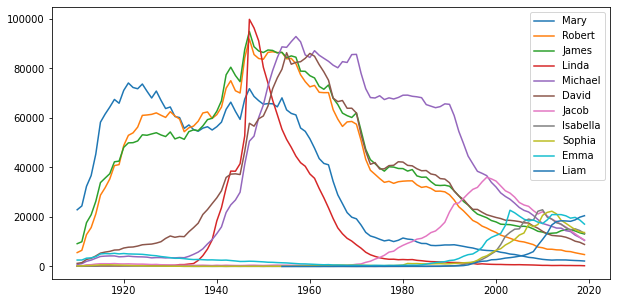

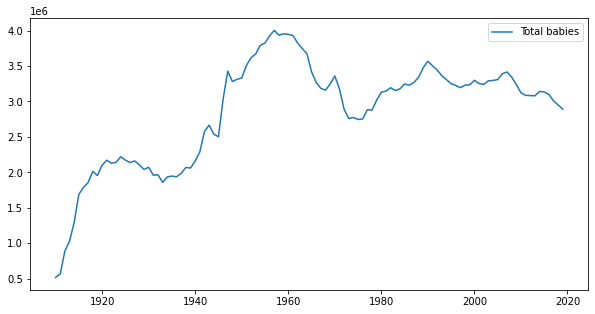

In [ ]:
from matplotlib import pyplot

pyplot.figure(figsize=(10,5))
for name in PlotNames['name']:
  g = Graph[Graph['name'] == name]
  pyplot.plot(g['year'], g['count'], label=name)

_ = pyplot.legend(loc='best')

pyplot.figure(figsize=(10,5))
_ = pyplot.plot(TotalBabies['year'],
                TotalBabies['logica_value'],
                label='Total babies')
_ = pyplot.legend(loc='best')

## APPENDIX

### Assignment and Equality

It is unusual that we are using the same operator `==` for both assignment and comparison.

This happens because in Logica what `==` stands for is determined from the context.

Consider a simple toy table T and a defined predicate DoubleT.

In [ ]:
%%logica T, DoubleT

T(1, "apple");
T(2, "banana");
T(3, "orange");

DoubleT(d, y) :- T(x, y), d == 2 * x;

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running T


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at T_sql variable.
SELECT * FROM (
  
    SELECT
      1 AS col0,
      "apple" AS col1
   UNION ALL
  
    SELECT
      2 AS col0,
      "banana" AS col1
   UNION ALL
  
    SELECT
      3 AS col0,
      "orange" AS col1
  
) AS UNUSED_TABLE_NAME  ;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at T variable.


,col0,col1
0,1,apple
1,2,banana
2,3,orange


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running DoubleT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at DoubleT_sql variable.
WITH t_0_T AS (SELECT * FROM (
  
    SELECT
      1 AS col0,
      "apple" AS col1
   UNION ALL
  
    SELECT
      2 AS col0,
      "banana" AS col1
   UNION ALL
  
    SELECT
      3 AS col0,
      "orange" AS col1
  
) AS UNUSED_TABLE_NAME  )
SELECT
  ((2) * (T.col0)) AS col0,
  T.col1 AS col1
FROM
  t_0_T AS T;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at DoubleT variable.


,col0,col1
0,2,apple
1,4,banana
2,6,orange


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Here it appears that we are **assigning** variable $d$ a value of $2 * x$.

But now consider the following usage:

In [ ]:
%%logica MyFruit

T(1, "apple");
T(2, "banana");
T(3, "orange");

DoubleT(d, y) :- T(x, y), d == 2 * x;

MyFruit(f) :- DoubleT(6, f);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Running MyFruit


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at MyFruit_sql variable.
WITH t_0_T AS (SELECT * FROM (
  
    SELECT
      1 AS col0,
      "apple" AS col1
   UNION ALL
  
    SELECT
      2 AS col0,
      "banana" AS col1
   UNION ALL
  
    SELECT
      3 AS col0,
      "orange" AS col1
  
) AS UNUSED_TABLE_NAME  )
SELECT
  T.col1 AS col0
FROM
  t_0_T AS T
WHERE
  6 = ((2) * (T.col0));


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at MyFruit variable.


,col0
0,orange


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Here when `MyFruit` is querried the expression `d == 2 * x` appears to be a condition for filtering rows of T.

Thusly there is not a clear difference between equality and assignment and they are not differentiated in the syntax.

### Using SQLite

SQLite is a great backend to learn Logica if you do not have Google Cloud project id yet.

In [ ]:
from logica import colab_logica

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at MyFirstPredicate_sql variable.
SELECT
  'Hello world!' AS col0;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

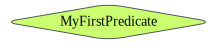

Running predicate: MyFirstPredicate


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at MyFirstPredicate variable.


,col0
0,Hello world!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%logica MyFirstPredicate

@Engine("sqlite");

MyFirstPredicate("Hello world!")

### Working with Booleans

You can turn a boolean value to a constraint by comparing it with `true` or with `Constraint` predicate.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at Graduate_v1_sql variable.
WITH t_0_Person AS (SELECT * FROM (
  
    SELECT
      "John" AS name,
      true AS has_graduate_degree
   UNION ALL
  
    SELECT
      "Jane" AS name,
      false AS has_graduate_degree
   UNION ALL
  
    SELECT
      "Maria" AS name,
      true AS has_graduate_degree
   UNION ALL
  
    SELECT
      "Dorian" AS name,
      false AS has_graduate_degree
  
) AS UNUSED_TABLE_NAME  )
SELECT
  Person.name AS name
FROM
  t_0_Person AS Person
WHERE
  Person.has_graduate_degree;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at Graduate_v2_sql variable.
WITH t_0_Person AS (SELECT * FROM (
  
    SELECT
      "John" AS name,
      true AS has_graduate_degree
   UNION ALL
  
    SELECT
      "Jane" AS name,
      false AS has_graduate_degree
   UNION ALL
  
    SELECT
      "Maria" AS name,
      true AS has_graduate_degree
   UNION ALL
  
    SELECT
      "Dorian" AS name,
      false AS has_graduate_degree
  
) AS UNUSED_TABLE_NAME  )
SELECT
  Person.name AS name
FROM
  t_0_Person AS Person
WHERE
  (Person.has_graduate_degree = true);


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at NotGraduate_sql variable.
WITH t_0_Person AS (SELECT * FROM (
  
    SELECT
      "John" AS name,
      true AS has_graduate_degree
   UNION ALL
  
    SELECT
      "Jane" AS name,
      false AS has_graduate_degree
   UNION ALL
  
    SELECT
      "Maria" AS name,
      true AS has_graduate_degree
   UNION ALL
  
    SELECT
      "Dorian" AS name,
      false AS has_graduate_degree
  
) AS UNUSED_TABLE_NAME  )
SELECT
  Person.name AS name
FROM
  t_0_Person AS Person
WHERE
  NOT Person.has_graduate_degree;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

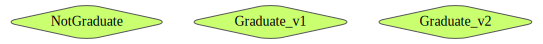

Running predicate: NotGraduate
Running predicate: Graduate_v1
Running predicate: Graduate_v2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at Graduate_v1 variable.


,name
0,John
1,Maria


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at Graduate_v2 variable.


,name
0,John
1,Maria


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at NotGraduate variable.


,name
0,Jane
1,Dorian


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%logica Graduate_v1, Graduate_v2, NotGraduate

Person(name: "John", has_graduate_degree: true);
Person(name: "Jane", has_graduate_degree: false);
Person(name: "Maria", has_graduate_degree: true);
Person(name: "Dorian", has_graduate_degree: false);

Graduate_v1(name:) :-
  Person(name:, has_graduate_degree:),
  Constraint(has_graduate_degree);

Graduate_v2(name:) :-
  Person(name:, has_graduate_degree:),
  has_graduate_degree == true;

NotGraduate(name:) :-
  Person(name:, has_graduate_degree:),
  Constraint(!has_graduate_degree);

Conjunction, disjunction and negation of boolean values is done with `&&`, `||` and `!` operators respectively. These operators correspond to `,`, `|` and `~` discussed above.

Basis relations `==`, `>`, `>=`, etc can act as propositions and boolean functions, so both boolean and propositional and boolean operations could be applied to them.

For conjuncts of the predicate you are encouraged to use `,` but for negation and disjuctions of the boolean `!` and `||` should be preferred, as that results in simpler SQL code.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at WritesCode_sql variable.
WITH t_0_Employee AS (SELECT * FROM (
  
    SELECT
      'Alice' AS name,
      'Product Manager' AS role,
      'SEA' AS office
   UNION ALL
  
    SELECT
      'Bob' AS name,
      'Engineer' AS role,
      'SEA' AS office
   UNION ALL
  
    SELECT
      'Caroline' AS name,
      'Engineer' AS role,
      'LAX' AS office
   UNION ALL
  
    SELECT
      'David' AS name,
      'Data Scientist' AS role,
      'LAX' AS office
   UNION ALL
  
    SELECT
      'Eve' AS name,
      'Data Scientist' AS role,
      'SEA' AS office
  
) AS UNUSED_TABLE_NAME  )
SELECT
  Employee.name AS name
FROM
  t_0_Employee AS Employee
WHERE
  ((Employee.role = 'Engineer') OR (Employee.role = 'Data Scientist'));


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at WritesNoCode_sql variable.
WITH t_0_Employee AS (SELECT * FROM (
  
    SELECT
      'Alice' AS name,
      'Product Manager' AS role,
      'SEA' AS office
   UNION ALL
  
    SELECT
      'Bob' AS name,
      'Engineer' AS role,
      'SEA' AS office
   UNION ALL
  
    SELECT
      'Caroline' AS name,
      'Engineer' AS role,
      'LAX' AS office
   UNION ALL
  
    SELECT
      'David' AS name,
      'Data Scientist' AS role,
      'LAX' AS office
   UNION ALL
  
    SELECT
      'Eve' AS name,
      'Data Scientist' AS role,
      'SEA' AS office
  
) AS UNUSED_TABLE_NAME  )
SELECT
  Employee.name AS name
FROM
  t_0_Employee AS Employee
WHERE
  NOT ((Employee.role = 'Engineer') OR (Employee.role = 'Data Scientist'));


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

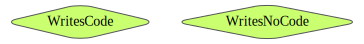

Running predicate: WritesCode
Running predicate: WritesNoCode


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at WritesCode variable.


,name
0,Bob
1,Caroline
2,David
3,Eve


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at WritesNoCode variable.


,name
0,Alice


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%logica WritesCode,WritesNoCode

@Engine("sqlite");

Employee(name: "Alice", role: "Product Manager", office: "SEA");
Employee(name: "Bob", role: "Engineer", office: "SEA");
Employee(name: "Caroline", role: "Engineer", office: "LAX");
Employee(name: "David", role: "Data Scientist", office: "LAX");
Employee(name: "Eve", role: "Data Scientist", office: "SEA");

# Example of extracting engineers and data scientists with
# boolean disjunction.
WritesCode(name:) :-
  Employee(name:, role:),
  (role == "Engineer" || role == "Data Scientist");

# Extracting of everyone except for engineers and data scientists
# with boolean disjunction and negation.
WritesNoCode(name:) :-
  Employee(name:, role:),
  !(role == "Engineer" || role == "Data Scientist");


### `LIKE` operator

SQL's `LIKE` string matching operator is accessible via `Like` function.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at Jane_sql variable.
WITH t_0_Person AS (SELECT * FROM (
  
    SELECT
      'John Smith' AS name
   UNION ALL
  
    SELECT
      'Jane Smith' AS name
   UNION ALL
  
    SELECT
      'Jane Johnson' AS name
  
) AS UNUSED_TABLE_NAME  )
SELECT
  Person.name AS name
FROM
  t_0_Person AS Person
WHERE
  (Person.name LIKE 'Jane %');


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at Smith_sql variable.
WITH t_0_Person AS (SELECT * FROM (
  
    SELECT
      'John Smith' AS name
   UNION ALL
  
    SELECT
      'Jane Smith' AS name
   UNION ALL
  
    SELECT
      'Jane Johnson' AS name
  
) AS UNUSED_TABLE_NAME  )
SELECT
  Person.name AS name
FROM
  t_0_Person AS Person
WHERE
  (Person.name LIKE '% Smith');


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

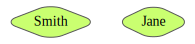

Running predicate: Smith
Running predicate: Jane


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at Jane variable.


,name
0,Jane Smith
1,Jane Johnson


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at Smith variable.


,name
0,John Smith
1,Jane Smith


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%logica Jane, Smith

@Engine("sqlite");

Person(name: "John Smith");
Person(name: "Jane Smith");
Person(name: "Jane Johnson");

Jane(name:) :- Person(name:), Like(name, "Jane %");
Smith(name:) :- Person(name:), Like(name, "% Smith");

### Positional and named arguments

Arguments of a predicate can be _positional_ or _named_.
In the call to the predicate positional arguments are listed separated by coma while named arguments are provide by specifying names.

In the output tables columns for positional arguments are given names `col0`, `col1`, `col2` etc.

Most examples above use named arguments.

See examples of positional and named arguments below.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at T1_sql variable.
SELECT
  x_2.value AS a,
  x_3.value AS b,
  ((x_2.value) + (x_3.value)) AS s
FROM
  JSON_EACH((select json_group_array(n) from (with recursive t as(select 0 as n union all select n + 1 as n from t where n + 1 < 3) select n from t))) as x_2, JSON_EACH((select json_group_array(n) from (with recursive t as(select 0 as n union all select n + 1 as n from t where n + 1 < 3) select n from t))) as x_3;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at T2_sql variable.
SELECT
  x_2.value AS col0,
  x_3.value AS col1,
  ((x_2.value) + (x_3.value)) AS col2
FROM
  JSON_EACH((select json_group_array(n) from (with recursive t as(select 0 as n union all select n + 1 as n from t where n + 1 < 3) select n from t))) as x_2, JSON_EACH((select json_group_array(n) from (with recursive t as(select 0 as n union all select n + 1 as n from t where n + 1 < 3) select n from t))) as x_3;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at T3_sql variable.
SELECT
  x_18.value AS col0,
  x_19.value AS col1,
  ((x_18.value) + (x_19.value)) AS col2,
  x_14.value AS a,
  x_15.value AS b,
  ((x_14.value) + (x_15.value)) AS s
FROM
  JSON_EACH((select json_group_array(n) from (with recursive t as(select 0 as n union all select n + 1 as n from t where n + 1 < 3) select n from t))) as x_14, JSON_EACH((select json_group_array(n) from (with recursive t as(select 0 as n union all select n + 1 as n from t where n + 1 < 3) select n from t))) as x_15, JSON_EACH((select json_group_array(n) from (with recursive t as(select 0 as n union all select n + 1 as n from t where n + 1 < 3) select n from t))) as x_18, JSON_EACH((select json_group_array(n) from (with recursive t as(select 0 as n union all select n + 1 as n from t where n + 1 < 3) select n from t))) as x_19;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

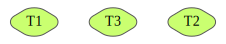

Running predicate: T1
Running predicate: T3
Running predicate: T2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at T1 variable.


,a,b,s
0,0,0,0
1,0,1,1
2,0,2,2
3,1,0,1
4,1,1,2
5,1,2,3
6,2,0,2
7,2,1,3
8,2,2,4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at T2 variable.


,col0,col1,col2
0,0,0,0
1,0,1,1
2,0,2,2
3,1,0,1
4,1,1,2
5,1,2,3
6,2,0,2
7,2,1,3
8,2,2,4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at T3 variable.


,col0,col1,col2,a,b,s
0,0,0,0,0,0,0
1,0,1,1,0,0,0
2,0,2,2,0,0,0
3,1,0,1,0,0,0
4,1,1,2,0,0,0
...,...,...,...,...,...,...
76,1,1,2,2,2,4
77,1,2,3,2,2,4
78,2,0,2,2,2,4
79,2,1,3,2,2,4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%logica T1, T2, T3

@Engine("sqlite");
# Predicate using named arguments.
T1(a: x, b: y, s: x + y) :- x in Range(3), y in Range(3);
# Predicate using positional arguments.
T2(x, y, x + y) :- x in Range(3), y in Range(3);

# It is allowed to have positional arguments followed by named arguments.
# When variable is missing in named argument, it is implied that
# the variable name is the same as the field name.
T3(x, y, z, a:, b:, s:) :- T1(a:, b:, s:), T2(x, y, z);


### Writing database tables

`@Ground` annotation associates Logica predicate with a database table. It has form

```
@Ground(Table, "dataset_name.tablename");
```

Or simply

```
@Ground(Table)
```

and then the table name is assumed to be `logica_test.Table`.

When predicate associated with a table is used in another predicate then the table is written into the database and read.




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at SaveOdd_sql variable.
DROP TABLE IF EXISTS logica_test.Odd;
CREATE TABLE logica_test.Odd AS SELECT
  ((((2) * (x_0))) + (1)) AS col0
FROM
  UNNEST(GENERATE_ARRAY(0, 10 - 1)) as x_0;

-- Interacting with table logica_test.Odd

SELECT
  SUM(1) AS logica_value
FROM
  logica_test.Odd AS Odd;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

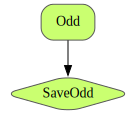

Running predicate: Odd
Running predicate: SaveOdd


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at SaveOdd variable.


,logica_value
0,10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%logica SaveOdd

@Ground(Odd);

Odd(2 * x + 1) :- x in Range(10);

SaveOdd() += 1 :- Odd();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following query is stored at QueryOdd_sql variable.
SELECT
  logica_test_Odd.col0 AS col0
FROM
  logica_test.Odd AS logica_test_Odd;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

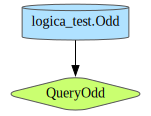

Running predicate: QueryOdd


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The following table is stored at QueryOdd variable.


,col0
0,17
1,3
2,9
3,15
4,11
5,5
6,13
7,1
8,19
9,7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%logica QueryOdd

QueryOdd(x) :- logica_test.Odd(x);